# CSE1015 - Machine Learning Essentials
# Pinni Venkata Abhiram
# 20BAI1132

### Challenging Experiment 
### Various types of regression 

### Importing all the modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression as linearreg
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split as tsplit
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate

### Ignoring the Warnings

In [3]:
warnings.filterwarnings('ignore')

### Preprocessing for the dataset

#### Importing the dataset

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.columns

Index(['Sample Number', 'X1', 'X2', 'X3', 'Y2', 'Z1'], dtype='object')

#### For the given Stage - 1 Classifier the Sample Number and the value of Z1 aren't required so we drop them

In [6]:
df = df.drop(["Sample Number","Z1"],axis = 1)

#### Viewing the dataset

In [7]:
df.head(10)

,X1,X2,X3,Y2
0,50.0,6.0,30.0,4.86
1,50.0,6.0,45.0,4.97
2,50.0,6.0,60.0,5.79
3,50.0,6.0,75.0,6.28
4,50.0,8.0,30.0,5.06
5,50.0,8.0,45.0,5.20
6,50.0,8.0,60.0,5.91
7,50.0,8.0,75.0,8.65
8,50.0,10.0,30.0,5.78
9,50.0,10.0,45.0,5.90


#### Info about the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      66 non-null     float64
 1   X2      64 non-null     float64
 2   X3      64 non-null     float64
 3   Y2      64 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


#### Describing the dataset

In [9]:
df.describe()

,X1,X2,X3,Y2
count,66.000000,64.000000,64.000000,64.000000
mean,125.000000,9.000000,52.500000,7.531719
std,57.008771,2.253745,16.903085,1.299308
min,50.000000,6.000000,30.000000,4.860000
25%,62.500000,7.500000,41.250000,6.947500
50%,125.000000,9.000000,52.500000,7.210000
75%,187.500000,10.500000,63.750000,8.702500
max,200.000000,12.000000,75.000000,10.130000


### As we can observe the dataset is random and we need to scale it , we can use the method of Min Max Scalar for this process


#### Importing and using the Min Max Scalar

In [10]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [11]:
df_scaled1 = scalar.fit_transform(df)

#### Viewing the data after the Min Max Scalar where the minimum value of input is marked as zero and the max input value is marked as 1 and each input is given a decimal accordingly

In [12]:
df_scaled1

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.02087287],
       [0.        , 0.        , 0.66666667, 0.17647059],
       [0.        , 0.        , 1.        , 0.26944972],
       [0.        , 0.33333333, 0.        , 0.03795066],
       [0.        , 0.33333333, 0.33333333, 0.06451613],
       [0.        , 0.33333333, 0.66666667, 0.19924099],
       [0.        , 0.33333333, 1.        , 0.71916509],
       [0.        , 0.66666667, 0.        , 0.17457306],
       [0.        , 0.66666667, 0.33333333, 0.19734345],
       [0.        , 0.66666667, 0.66666667, 0.33206831],
       [0.        , 0.66666667, 1.        , 0.76470588],
       [0.        , 1.        , 0.        , 0.32827324],
       [0.        , 1.        , 0.33333333, 0.41555977],
       [0.        , 1.        , 0.66666667, 0.54079696],
       [0.        , 1.        , 1.        , 0.80455408],
       [0.33333333, 0.        , 0.        , 0.39658444],
       [0.33333333, 0.        ,

#### Now we can see that this is a numpy array and we need to convert it into a pandas dataframe

In [13]:
df_scaled_final = pd.DataFrame(df_scaled1, columns = ['X1','X2','X3','Y2'])

In [14]:
df_scaled_final.head(10)

,X1,X2,X3,Y2
0,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.333333,0.020873
2,0.0,0.000000,0.666667,0.176471
3,0.0,0.000000,1.000000,0.269450
4,0.0,0.333333,0.000000,0.037951
5,0.0,0.333333,0.333333,0.064516
6,0.0,0.333333,0.666667,0.199241
7,0.0,0.333333,1.000000,0.719165
8,0.0,0.666667,0.000000,0.174573
9,0.0,0.666667,0.333333,0.197343


#### Min Max Scalar normalised the data and we can now check for the null rows

In [15]:
df_scaled_final.columns

Index(['X1', 'X2', 'X3', 'Y2'], dtype='object')

In [16]:
df_scaled_final.isnull().sum()

X1    5
X2    7
X3    7
Y2    7
dtype: int64

#### There are null rows so we drop them

In [17]:
df_scaled_final = df_scaled_final.dropna()
df_scaled_final

,X1,X2,X3,Y2
0,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.333333,0.020873
2,0.0,0.000000,0.666667,0.176471
3,0.0,0.000000,1.000000,0.269450
4,0.0,0.333333,0.000000,0.037951
...,...,...,...,...
59,1.0,0.666667,1.000000,0.886148
60,1.0,1.000000,0.000000,0.611006
61,1.0,1.000000,0.333333,0.776091
62,1.0,1.000000,0.666667,0.759013


In [18]:
df_scaled_final.isnull().sum()

X1    0
X2    0
X3    0
Y2    0
dtype: int64

In [19]:
df_scaled_final.columns

Index(['X1', 'X2', 'X3', 'Y2'], dtype='object')

### Correlation values 

In [20]:
correlation = df_scaled_final.corr()
correlation['Y2']

X1    0.374505
X2    0.392176
X3    0.662444
Y2    1.000000
Name: Y2, dtype: float64

#### The target var for the question is Y2 so we find the correlation between the Y2 and the other variables
#### In the aboue result there is positive correlation and it's significant , the positive correlation means that means the values of the input variable and the output variable change in the same directions.
#### Therefore we have significant correlations so we don't drop any columns , all columns are important.

#### Correlation between explanatory variables

In [21]:
correlation = df_scaled_final.corr()
correlation[['X1','X2','X3']]

,X1,X2,X3
X1,1.000000e+00,1.811051e-16,7.494005e-17
X2,1.811051e-16,1.000000e+00,6.245005e-18
X3,7.494005e-17,6.245005e-18,1.000000e+00
Y2,3.745051e-01,3.921761e-01,6.624442e-01


### Correlation Plots

<AxesSubplot:>

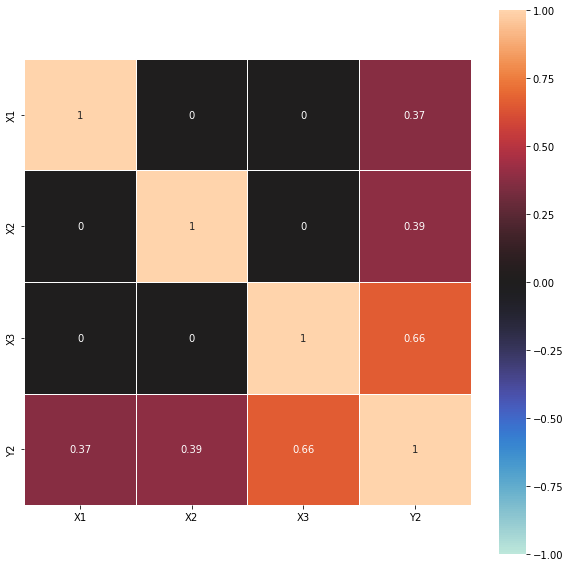

In [22]:
corr = df_scaled_final.corr().round(2)
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmin=-1, vmax=1, center=0,square=True, linewidths=1, cbar_kws={"shrink": 1}, annot=True)

#### Pairplot
#### Pairplot is usually a grid of plots for each variable in your dataset. Hence you can quickly see how all the variables are related. This can help to infer which variables are useful, which have skewed distribution etc.

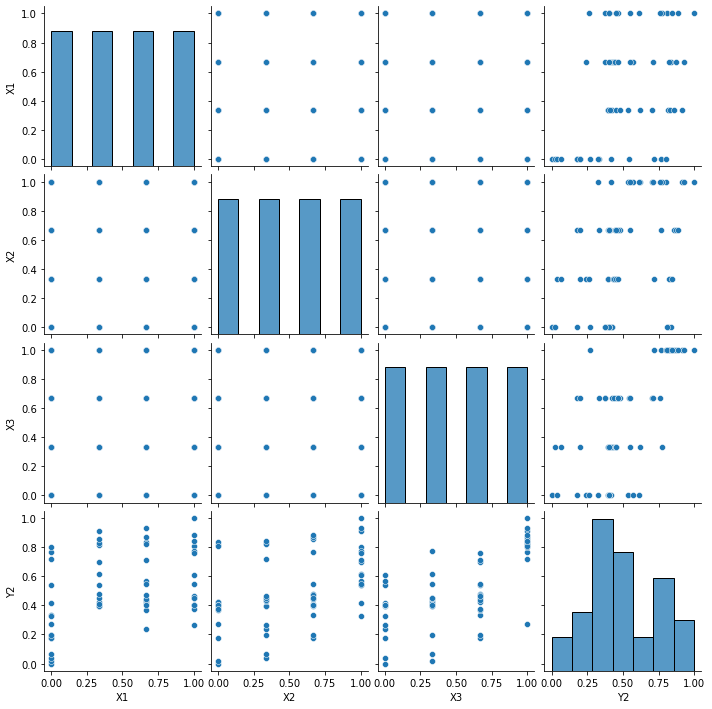

In [23]:
sns.pairplot(df_scaled_final)

In [24]:
X = df_scaled_final.drop(['Y2'],axis=1)
Y = df_scaled_final['Y2']

x_train , x_test, y_train , y_test = tsplit(X,Y,train_size=0.80,random_state = 101)

In [25]:
print (X.head , Y.head)

<bound method NDFrame.head of      X1        X2        X3
0   0.0  0.000000  0.000000
1   0.0  0.000000  0.333333
2   0.0  0.000000  0.666667
3   0.0  0.000000  1.000000
4   0.0  0.333333  0.000000
..  ...       ...       ...
59  1.0  0.666667  1.000000
60  1.0  1.000000  0.000000
61  1.0  1.000000  0.333333
62  1.0  1.000000  0.666667
63  1.0  1.000000  1.000000

[64 rows x 3 columns]> <bound method NDFrame.head of 0     0.000000
1     0.020873
2     0.176471
3     0.269450
4     0.037951
        ...   
59    0.886148
60    0.611006
61    0.776091
62    0.759013
63    1.000000
Name: Y2, Length: 64, dtype: float64>


### Linear Regression Model

#### Importing the regression model

In [26]:
model1 = linearreg()

In [27]:
model1.fit(x_train,y_train)

LinearRegression()

In [28]:
intercept = model1.intercept_
intercept

0.00892281401911954

#### Coefficients of the linear regression model

In [29]:
coefficients = pd.DataFrame(model1.coef_, x_train.columns, columns = ['coef']).sort_values(by = 'coef', ascending = False)
coefficients

,coef
X3,0.478069
X2,0.291592
X1,0.213084


In [30]:
reg_equation = "Y = " + str(intercept.round(5)) + " + "
reg_equation += "(" + str(coefficients.coef['X1'].round(5)) + ")" + X.columns[0]
for i in range(1, len(X.columns)):
    col = X.columns[i]
    reg_equation += " + (" + str(coefficients.coef[col].round(5)) + ")" + col
print(reg_equation)

Y = 0.00892 + (0.21308)X1 + (0.29159)X2 + (0.47807)X3


#### From the regression equation, it is evident that the variables move in same direction as compared to Y since they have the positive correlation coefficient.

#### Summary of result using the statsmodels api

In [31]:
result1 = sm.OLS(y_train, x_train).fit()
print(result1.summary())

                                 OLS Regression Results                                
Dep. Variable:                     Y2   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              348.7
Date:                Sun, 20 Mar 2022   Prob (F-statistic):                    1.42e-32
Time:                        11:08:41   Log-Likelihood:                          35.809
No. Observations:                  51   AIC:                                     -65.62
Df Residuals:                      48   BIC:                                     -59.82
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### The p statistic values of columns are 0 so we move on to check the Variance Inflation Factor or VIF valueBased off of the VIF Values, we drop the ones with the highest VIF values. Drop unnecessary input variables

In [32]:
vif  = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,X1,2.0125
1,X2,2.0125
2,X3,2.0125


#### VIF values are low and we can say the final regression equation is the one we got above because we aren't dropping any columns

#### Scatter Plot for explanatory variables

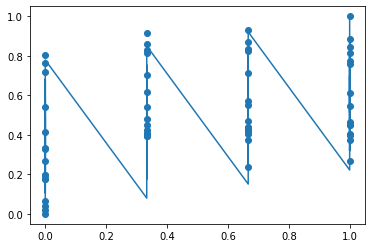

In [33]:
plt.scatter(X['X1'],Y)
eq = X*model1.coef_
eq = eq.sum(axis=1)+model1.intercept_
plt.plot(X['X1'], eq)

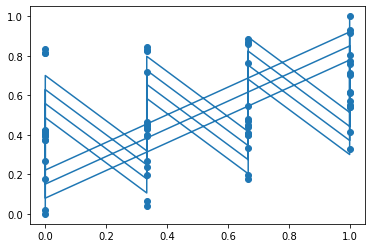

In [34]:
plt.scatter(X['X2'],Y)
eq = X*model1.coef_
eq = eq.sum(axis=1)+model1.intercept_
plt.plot(X['X2'], eq)

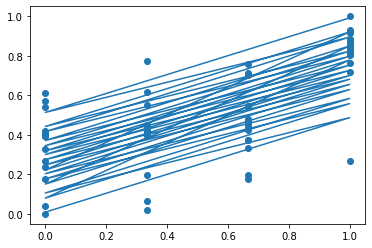

In [35]:
plt.scatter(X['X3'],Y)
eq = X*model1.coef_
eq = eq.sum(axis=1)+model1.intercept_
plt.plot(X['X3'], eq)

In [36]:
print("Final Linear Regression Equation is ", reg_equation)

Final Linear Regression Equation is  Y = 0.00892 + (0.21308)X1 + (0.29159)X2 + (0.47807)X3


In [37]:
predictions = model1.predict(x_test)
print(predictions)

[0.49586066 0.07995095 0.32763521 0.43370176 0.67295534 0.79727314
 0.33650446 0.22200724 0.73511424 0.70007584 0.1509791  0.16827901
 0.59305796]


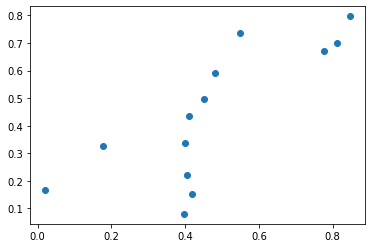

In [38]:
plt.scatter(y_test, predictions)

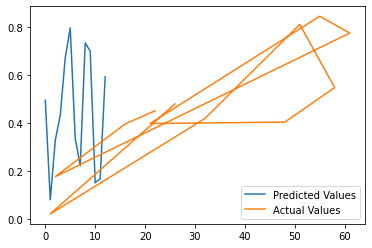

In [39]:
plt.plot(predictions, label = 'Predicted Values')
plt.plot(y_test, label = 'Actual Values')
plt.legend()

In [40]:
predictions_list = predictions.tolist()
Y_test_list = y_test.tolist()
print("Actual\tPredicted")
for i in range(len(Y_test_list)):
    print(Y_test_list[i], "\t" ,predictions_list[i])

Actual	Predicted
0.4516129032258065 	 0.4958606559322021
0.3965844402277039 	 0.07995095472325213
0.17647058823529416 	 0.3276352136265172
0.40986717267552164 	 0.4337017577300555
0.7760910815939277 	 0.672955340739873
0.8462998102466792 	 0.797273137144166
0.39848197343453506 	 0.3365044561285032
0.40417457305502835 	 0.2220072361315173
0.5483870967741935 	 0.7351142389420195
0.812144212523719 	 0.7000758355426138
0.4193548387096775 	 0.1509790954273847
0.020872865275142205 	 0.16827901382281832
0.48007590132827316 	 0.5930579575337543


In [41]:
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R_squared = metrics.r2_score(y_test,predictions)
adjusted_R_squared = 1 - (1 - metrics.r2_score(y_test, predictions)) * (len(Y)-1)/(len(Y)-X.shape[1]-1)

print("MSE (Mean Squared Error) : ", + MSE)
print("MAE (Mean Absolute Error): ", + MAE)
print("RMSE (Root Mean Squared Error ) : ", + RMSE)
print("Adjusted R squared value : " , adjusted_R_squared)

MSE (Mean Squared Error) :  0.02535735462804904
MAE (Mean Absolute Error):  0.13536516800208437
RMSE (Root Mean Squared Error ) :  0.1592399278700196
Adjusted R squared value :  0.48165993830916165


In [42]:
table_testing = [
                ['Input Variable Names', 'Regression', 'MSE', 'MAE', 'RMSE', 'R-Squared', 'Adjusted R-Squared'],
                [[X.columns[0],X.columns[1],X.columns[2]], reg_equation, MSE, MAE, RMSE, R_squared, adjusted_R_squared]
                ]
print(tabulate(table_testing, headers='firstrow'))

Input Variable Names    Regression                                                   MSE       MAE     RMSE    R-Squared    Adjusted R-Squared
----------------------  -----------------------------------------------------  ---------  --------  -------  -----------  --------------------
['X1', 'X2', 'X3']      Y = 0.00892 + (0.21308)X1 + (0.29159)X2 + (0.47807)X3  0.0253574  0.135365  0.15924     0.506343               0.48166


### Stage - 2 Classifier 

In [58]:
df2 = pd.read_csv('data.csv')
df2 = df2.drop(['Sample Number'],axis=1)
df2

,X1,X2,X3,Y2,Z1
0,50.0,6.0,30.0,4.86,18.0
1,50.0,6.0,45.0,4.97,19.0
2,50.0,6.0,60.0,5.79,20.0
3,50.0,6.0,75.0,6.28,27.0
4,50.0,8.0,30.0,5.06,19.0
...,...,...,...,...,...
66,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN
69,200.0,NaN,NaN,NaN,NaN


### Preprocessing and removing the unnecessary columns

In [59]:
scalar = MinMaxScaler()
df2 = scalar.fit_transform(df2)
df2

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.02087287, 0.03846154],
       [0.        , 0.        , 0.66666667, 0.17647059, 0.07692308],
       [0.        , 0.        , 1.        , 0.26944972, 0.34615385],
       [0.        , 0.33333333, 0.        , 0.03795066, 0.03846154],
       [0.        , 0.33333333, 0.33333333, 0.06451613, 0.23076923],
       [0.        , 0.33333333, 0.66666667, 0.19924099, 0.11538462],
       [0.        , 0.33333333, 1.        , 0.71916509, 0.19230769],
       [0.        , 0.66666667, 0.        , 0.17457306, 0.07692308],
       [0.        , 0.66666667, 0.33333333, 0.19734345, 0.07692308],
       [0.        , 0.66666667, 0.66666667, 0.33206831, 0.11538462],
       [0.        , 0.66666667, 1.        , 0.76470588, 0.23076923],
       [0.        , 1.        , 0.        , 0.32827324, 0.11538462],
       [0.        , 1.        , 0.33333333, 0.41555977, 0.15384615],
       [0.        , 1.        , 0.

In [62]:
df2_scaled_final = pd.DataFrame(df2, columns = ['X1','X2','X3','Y2','Z1'])
df2_scaled_final = df2_scaled_final["Z1"]
df2_scaled_final

0     0.000000
1     0.038462
2     0.076923
3     0.346154
4     0.038462
        ...   
66         NaN
67         NaN
68         NaN
69         NaN
70         NaN
Name: Z1, Length: 71, dtype: float64

In [64]:
df2_scaled_final.isnull().sum()

7

In [68]:
df2_scaled_final = df2_scaled_final.dropna()

In [69]:
df2_scaled_final.isnull().sum()

0

### Linear Regression Model

In [73]:
x_new_stage2 = pd.DataFrame(predictions_list, columns= ['Y2'])
y_new_stage2 = df2_scaled_final
x_new_stage2.head(10)

,Y2
0,0.495861
1,0.079951
2,0.327635
3,0.433702
4,0.672955
5,0.797273
6,0.336504
7,0.222007
8,0.735114
9,0.700076


In [75]:
y_new_stage2.head(10)

0    0.000000
1    0.038462
2    0.076923
3    0.346154
4    0.038462
5    0.230769
6    0.115385
7    0.192308
8    0.076923
9    0.076923
Name: Z1, dtype: float64

In [77]:
x_new_stage2.shape , y_new_stage2.shape

((13, 1), (64,))

#### Since the size of the Y is greater than X then we can get the first 13 columns of Y for training

In [79]:
y_new_stage2 = y_new_stage2 [:13]
y_new_stage2.shape

(13,)

### Linear Regression

#### Importing the module

In [82]:
linear_reg_model2 = linearreg()

x_train2 , x_test2, y_train2 , y_test2 = tsplit(x_new_stage2,y_new_stage2,train_size=0.80,random_state = 101)

In [105]:
linear_reg_model2.fit(x_train2,y_train2)

LinearRegression()

In [106]:
intercept = linear_reg_model2.intercept_
intercept

0.12750048343435413

In [107]:
coefficients = linear_reg_model2.coef_ 
coefficients

array([-0.03661854])

In [108]:
reg_equation = "Z1 = " + str(intercept.round(5)) + " + " + str(coefficients[0].round(5)) + " Y2"
reg_equation

'Z1 = 0.1275 + -0.03662 Y2'

### Results and Predictions

In [109]:
result = sm.OLS(y_train2, x_train2).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                     Z1   R-squared (uncentered):                   0.445
Model:                            OLS   Adj. R-squared (uncentered):              0.383
Method:                 Least Squares   F-statistic:                              7.212
Date:                Sun, 20 Mar 2022   Prob (F-statistic):                      0.0250
Time:                        11:34:50   Log-Likelihood:                          8.7055
No. Observations:                  10   AIC:                                     -15.41
Df Residuals:                       9   BIC:                                     -15.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [110]:
predictions = linear_reg_model2.predict(x_test2)
print(predictions)

[0.10578357 0.11550296 0.11161896]


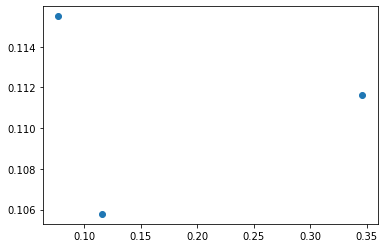

In [111]:
plt.scatter(y_test2, predictions)


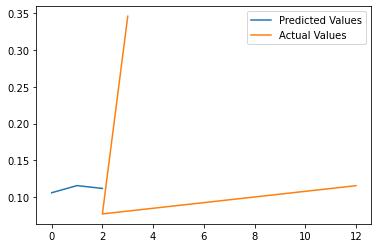

In [112]:
plt.plot(predictions, label = 'Predicted Values')
plt.plot(y_test2, label = 'Actual Values')
plt.legend()

### Metrics

In [113]:
MAE = metrics.mean_absolute_error(y_test2, predictions)
MSE = metrics.mean_squared_error(y_test2,predictions)
RMSE = np.sqrt(MSE)
R_squared = result.rsquared
adjusted_R_squared = result.rsquared_adj

In [116]:
table_testing = [
                ['Input Variable Names', 'Regression', 'MSE', 'MAE', 'RMSE', 'R-Squared', 'Adjusted R-Squared'],
                [[x_train2.columns[0]], reg_equation, MSE, MAE, RMSE, R_squared, adjusted_R_squared]
                ]
print(tabulate(table_testing, headers='firstrow'))

Input Variable Names    Regression                       MSE        MAE     RMSE    R-Squared    Adjusted R-Squared
----------------------  -------------------------  ---------  ---------  -------  -----------  --------------------
['Y2']                  Z1 = 0.1275 + -0.03662 Y2  0.0188624  0.0942386  0.13734     0.444852              0.383169
